# (Prosper Loan Analysis)
## by (Dina Amin)

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
#load dataset
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [4]:
df.shape

(113937, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

> (113937, 81) 
### What is/are the main feature(s) of interest in your dataset?

> LoanStatus,IncomeRange,BorrowerRate,EmploymentStatus,LoanOriginalAmount

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> TotalProsperLoans,Investors,BorrowerState,Occupation,IsBorrowerHomeowner,TotalInquiries,TotalCreditLinespast7years

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [6]:
#Create dataframe contain selected features only
df_summary=pd.concat([df['LoanStatus'],df['IncomeRange'],df['BorrowerRate'],df['EmploymentStatus'],df['EmploymentStatusDuration'],df['StatedMonthlyIncome'],df['IncomeVerifiable'],df['TotalProsperLoans'],df['LoanOriginalAmount'],df['Investors'],df['BorrowerState'],df['Occupation'],df['IsBorrowerHomeowner'],df['TotalInquiries'],df['TotalCreditLinespast7years']],axis=1)

In [7]:
df_summary.head(10)

,LoanStatus,IncomeRange,BorrowerRate,EmploymentStatus,EmploymentStatusDuration,StatedMonthlyIncome,IncomeVerifiable,TotalProsperLoans,LoanOriginalAmount,Investors,BorrowerState,Occupation,IsBorrowerHomeowner,TotalInquiries,TotalCreditLinespast7years
0,Completed,"$25,000-49,999",0.1580,Self-employed,2.0,3083.333333,True,NaN,9425,258,CO,Other,True,3.0,12.0
1,Current,"$50,000-74,999",0.0920,Employed,44.0,6125.000000,True,NaN,10000,1,CO,Professional,False,5.0,29.0
2,Completed,Not displayed,0.2750,Not available,NaN,2083.333333,True,NaN,3001,41,GA,Other,False,1.0,3.0
3,Current,"$25,000-49,999",0.0974,Employed,113.0,2875.000000,True,NaN,10000,158,GA,Skilled Labor,True,1.0,29.0
4,Current,"$100,000+",0.2085,Employed,44.0,9583.333333,True,1.0,15000,20,MN,Executive,True,9.0,49.0
5,Current,"$100,000+",0.1314,Employed,82.0,8333.333333,True,NaN,15000,1,NM,Professional,True,2.0,49.0
6,Current,"$25,000-49,999",0.2712,Employed,172.0,2083.333333,True,NaN,3000,1,KS,Sales - Retail,False,0.0,20.0
7,Current,"$25,000-49,999",0.2019,Employed,103.0,3355.750000,True,NaN,10000,1,CA,Laborer,False,16.0,10.0
8,Current,"$25,000-49,999",0.0629,Employed,269.0,3333.333333,True,NaN,10000,1,IL,Food Service,True,6.0,32.0
9,Current,"$25,000-49,999",0.0629,Employed,269.0,3333.333333,True,NaN,10000,1,IL,Food Service,True,6.0,32.0


In [8]:
#check null value
df_summary.isna().sum()

LoanStatus                        0
IncomeRange                       0
BorrowerRate                      0
EmploymentStatus               2255
EmploymentStatusDuration       7625
StatedMonthlyIncome               0
IncomeVerifiable                  0
TotalProsperLoans             91852
LoanOriginalAmount                0
Investors                         0
BorrowerState                  5515
Occupation                     3588
IsBorrowerHomeowner               0
TotalInquiries                 1159
TotalCreditLinespast7years      697
dtype: int64

In [9]:
# fill null value for categorical and quantitative
df_summary['EmploymentStatus'].fillna('Not available',inplace=True)
df_summary.fillna(0,inplace=True)

In [10]:
df_summary.isna().sum()

LoanStatus                    0
IncomeRange                   0
BorrowerRate                  0
EmploymentStatus              0
EmploymentStatusDuration      0
StatedMonthlyIncome           0
IncomeVerifiable              0
TotalProsperLoans             0
LoanOriginalAmount            0
Investors                     0
BorrowerState                 0
Occupation                    0
IsBorrowerHomeowner           0
TotalInquiries                0
TotalCreditLinespast7years    0
dtype: int64

In [11]:
df_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   LoanStatus                  113937 non-null  object 
 1   IncomeRange                 113937 non-null  object 
 2   BorrowerRate                113937 non-null  float64
 3   EmploymentStatus            113937 non-null  object 
 4   EmploymentStatusDuration    113937 non-null  float64
 5   StatedMonthlyIncome         113937 non-null  float64
 6   IncomeVerifiable            113937 non-null  bool   
 7   TotalProsperLoans           113937 non-null  float64
 8   LoanOriginalAmount          113937 non-null  int64  
 9   Investors                   113937 non-null  int64  
 10  BorrowerState               113937 non-null  object 
 11  Occupation                  113937 non-null  object 
 12  IsBorrowerHomeowner         113937 non-null  bool   
 13  TotalInquiries

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

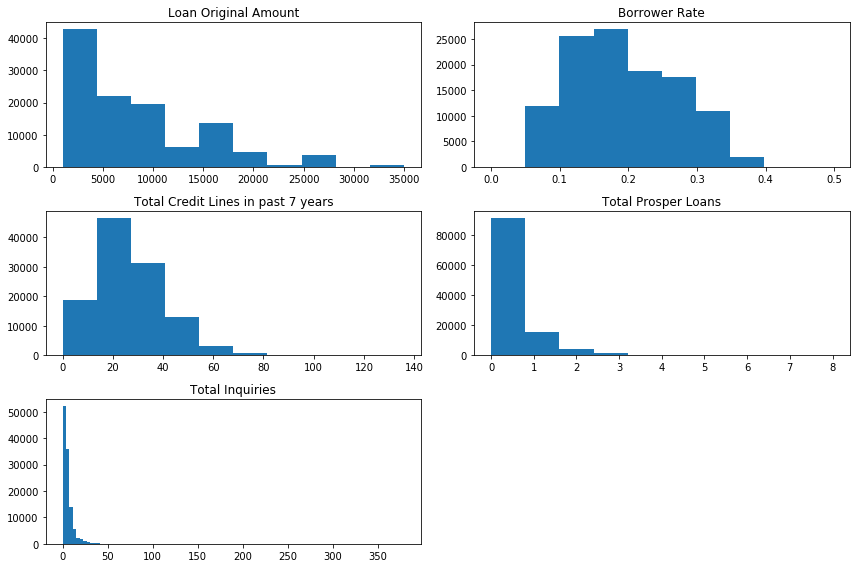

In [12]:
# Distribution of quantitive features
fig = plt.figure(figsize=(12, 8))
plt.subplot(3, 2, 1)
df_summary['LoanOriginalAmount'].hist(grid=False)
plt.title('Loan Original Amount')
plt.subplot(3, 2, 2)
df_summary['BorrowerRate'].hist(grid=False)
plt.title('Borrower Rate')
plt.subplot(3, 2, 3)
df_summary['TotalCreditLinespast7years'].hist(grid=False)
plt.title('Total Credit Lines in past 7 years')
plt.subplot(3, 2, 4)
df_summary['TotalProsperLoans'].hist(grid=False)
plt.title('Total Prosper Loans')
plt.subplot(3, 2, 5)
df_summary['TotalInquiries'].hist(grid=False,bins=100)
plt.title('Total Inquiries')
plt.tight_layout()
plt.show()

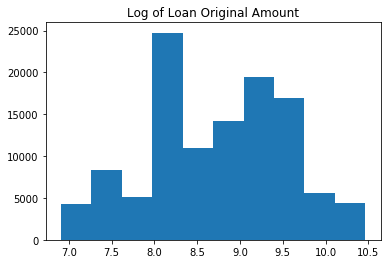

In [13]:
# since normal distribution is better for linear relation so we transform it to log.
df_summary['LoanOriginalAmountLog']=np.log(df_summary['LoanOriginalAmount'])
df_summary['LoanOriginalAmountLog'].hist(grid=False)
plt.title('Log of Loan Original Amount')
plt.show()

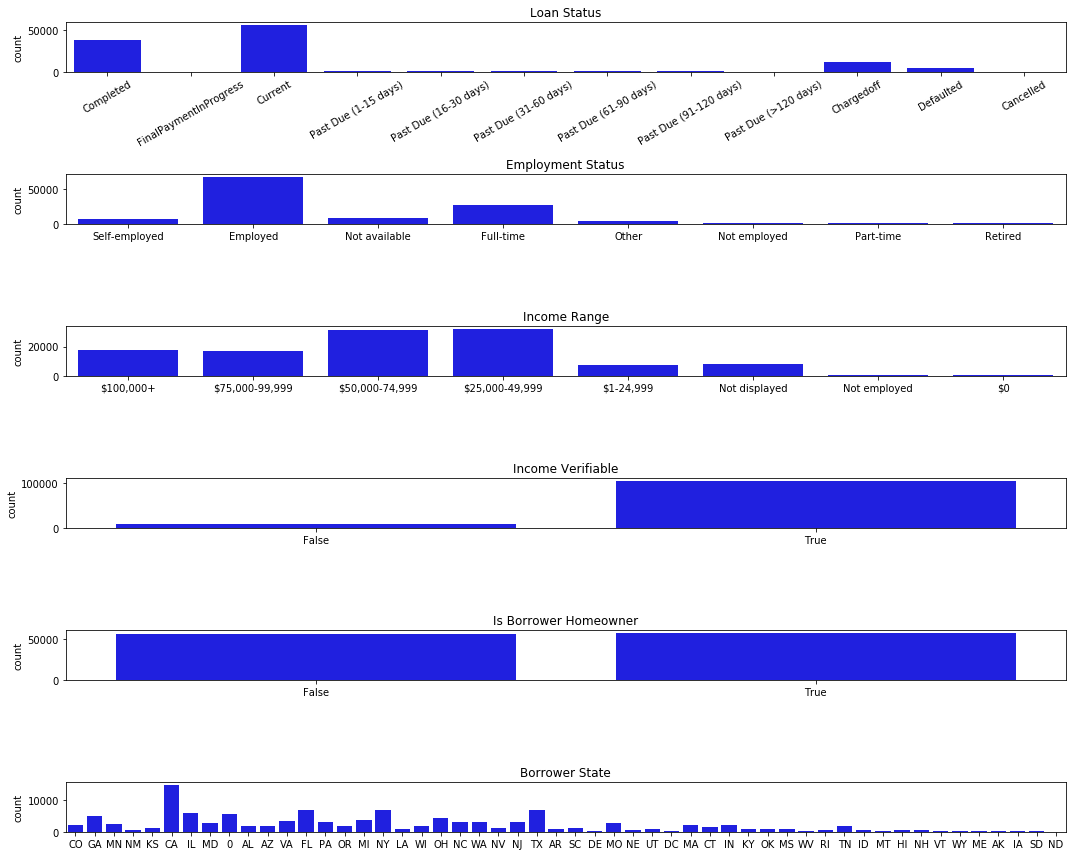

In [14]:
# Distribution of qualitative features
fig = plt.figure(figsize=(15, 12))
plt.subplot(6, 1, 1)
sb.countplot(data=df_summary,x='LoanStatus',color='blue',order=['Completed', 'FinalPaymentInProgress', 'Current', 'Past Due (1-15 days)', 
        'Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)', 'Past Due (91-120 days)','Past Due (>120 days)',
                                                      'Chargedoff','Defaulted', 'Cancelled'])
plt.xlabel('')
plt.title('Loan Status')
plt.xticks(rotation=30)
plt.subplot(6, 1, 2)
sb.countplot(data=df_summary,x='EmploymentStatus',color='blue')
plt.xlabel('')
plt.title('Employment Status')
plt.subplot(6, 1, 3)
sb.countplot(data=df_summary,x='IncomeRange',color='blue',order=['$100,000+','$75,000-99,999', '$50,000-74,999','$25,000-49,999',
       '$1-24,999','Not displayed', 'Not employed', '$0'])
plt.xlabel('')
plt.title('Income Range')
plt.subplot(6, 1, 4)
sb.countplot(data=df_summary,x='IncomeVerifiable',color='blue')
plt.xlabel('')
plt.title('Income Verifiable')
plt.subplot(6, 1, 5)
sb.countplot(data=df_summary,x='IsBorrowerHomeowner',color='blue')
plt.xlabel('')
plt.title('Is Borrower Homeowner')
plt.subplot(6, 1, 6)
sb.countplot(data=df_summary,x='BorrowerState',color='blue')
plt.xlabel('')
plt.title('Borrower State')
plt.tight_layout()
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For quantative features distribution:
    BorrowerRate is close to normal(Gaussien) but with two other picks at approximately .25 and .32, the higher picks is at .15
    TotalCreditLinespast7years is close to normal(Gaussien).
    EmploymentStatusDuration,Investors is right skewed
    LoanOriginalAmount is right skewed but with picks between 15000 and 17000.
    TotalProsperLoans,TotalInquiries all data is take small value range.
>  For qualitative features distribution: 
    Most loan is current or completed
    Most Loans is in Income range between 25,000-49,0000 or 50,000-74,000
    Most borrower is Employeed and with verifier income
    Home owner or not is almost equi.
    Borrower State of CA is the higest percentage of loans 
 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> since normal ditribution is better in linear relation and loan original amount is a major feature,so add log of loan amount and use it in visualization ,high number of loans is between 3000 and 4000

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

What factors affect a loan’s outcome status?

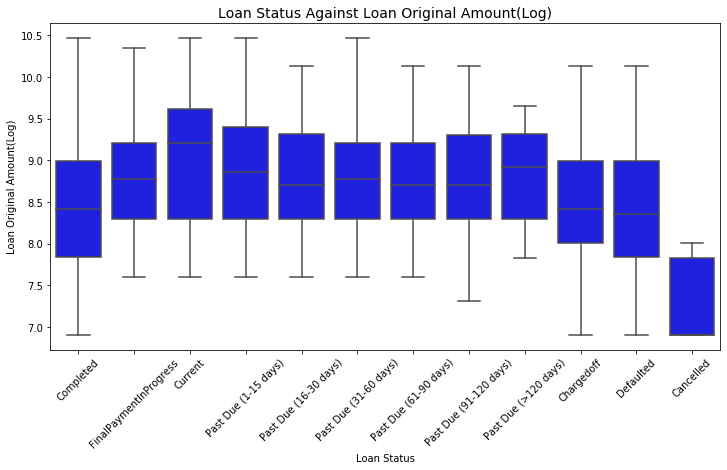

In [30]:
# plot Loan Status Against Loan Original Amount(Log)
fig = plt.figure(figsize=(12, 6))
sb.boxplot(data=df_summary,x='LoanStatus',y='LoanOriginalAmountLog',color='blue',order=['Completed', 'FinalPaymentInProgress', 'Current', 'Past Due (1-15 days)', 
        'Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)', 'Past Due (91-120 days)','Past Due (>120 days)',
                                                      'Chargedoff','Defaulted', 'Cancelled'])
plt.xticks(rotation=45)
plt.title('Loan Status Against Loan Original Amount(Log)',fontsize=14)
plt.xlabel('Loan Status')
plt.ylabel('Loan Original Amount(Log)')
plt.show()

Current loan status have higher loan amount and wider range of values,all cancelled loans have  low loan amount

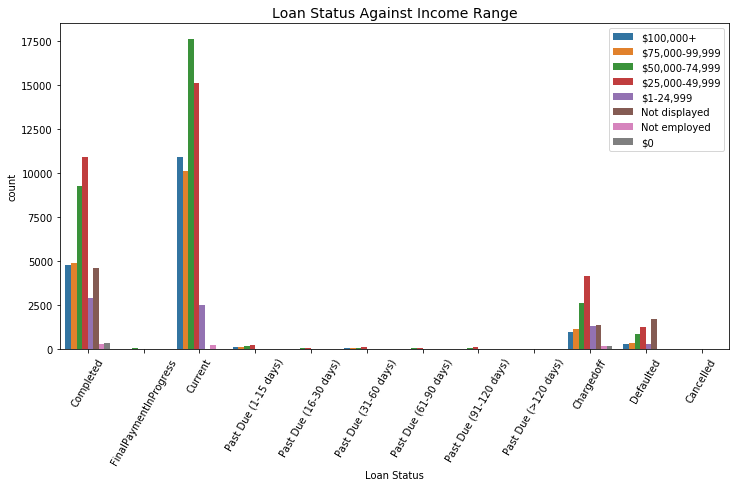

In [39]:
# plot Loan Status Against Income Range
fig = plt.figure(figsize=(12, 6))
sb.countplot(data=df_summary,x='LoanStatus',hue='IncomeRange',order=['Completed', 'FinalPaymentInProgress', 'Current', 'Past Due (1-15 days)', 
        'Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)', 'Past Due (91-120 days)','Past Due (>120 days)',
        'Chargedoff','Defaulted', 'Cancelled'],hue_order=['$100,000+','$75,000-99,999', '$50,000-74,999','$25,000-49,999',
       '$1-24,999','Not displayed', 'Not employed', '$0'])
plt.xticks(rotation=60)
plt.title('Loan Status Against Income Range',fontsize=14)
plt.xlabel('Loan Status')
plt.legend(loc='upper right')
plt.show()

Most of loans have Status of current or completed is associated with income range from 25,000-49,999 or from 50,000-74,999.

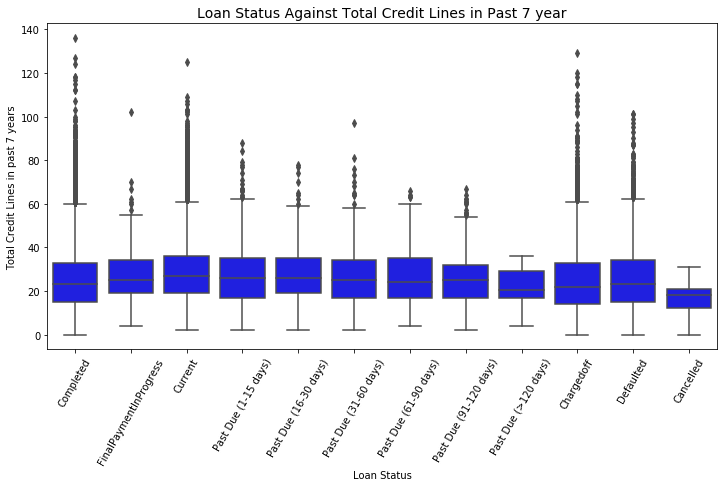

In [40]:
#plot Loan Status Against Total Credit Lines in Past 7 year
fig = plt.figure(figsize=(12, 6))
sb.boxplot(data=df_summary,x='LoanStatus',y='TotalCreditLinespast7years',color='blue',order=['Completed', 'FinalPaymentInProgress', 'Current', 'Past Due (1-15 days)', 
        'Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)', 'Past Due (91-120 days)','Past Due (>120 days)',
        'Chargedoff','Defaulted', 'Cancelled'])
plt.title('Loan Status Against Total Credit Lines in Past 7 year',fontsize=14)
plt.xticks(rotation=60)
plt.xlabel('Loan Status')
plt.ylabel('Total Credit Lines in past 7 years')
plt.show()

For completed,current and charged off loans status there is a lot a loans with high total credit lines in past 7 years which is far away from median.

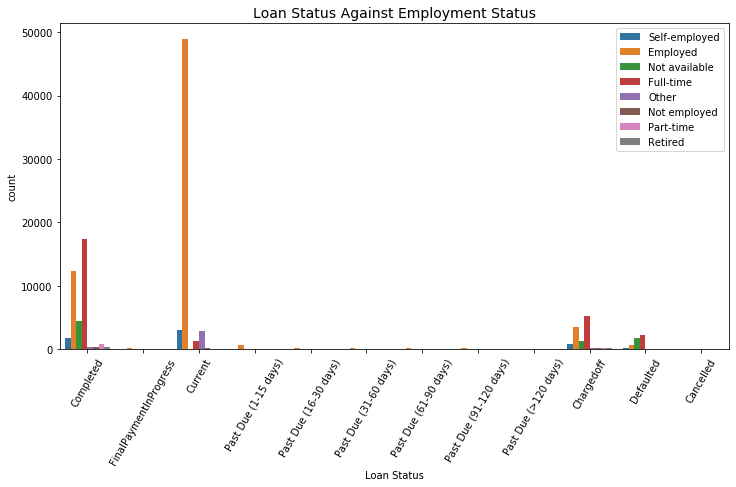

In [41]:
#plot Loan Status Against Employment Status
fig = plt.figure(figsize=(12,6))
sb.countplot(data=df_summary,x='LoanStatus',hue='EmploymentStatus',order=['Completed', 'FinalPaymentInProgress', 'Current', 'Past Due (1-15 days)', 
        'Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)', 'Past Due (91-120 days)','Past Due (>120 days)',
                                                      'Chargedoff','Defaulted', 'Cancelled'])
plt.title('Loan Status Against Employment Status',fontsize=14)
plt.xticks(rotation=60)
plt.xlabel('Loan Status')
plt.legend(loc='upper right')
plt.show()

Most current loans is with employed status, and completed loans is with employed and full time

there is no meaninful relation between loan amount and any quantitative values as in next chart

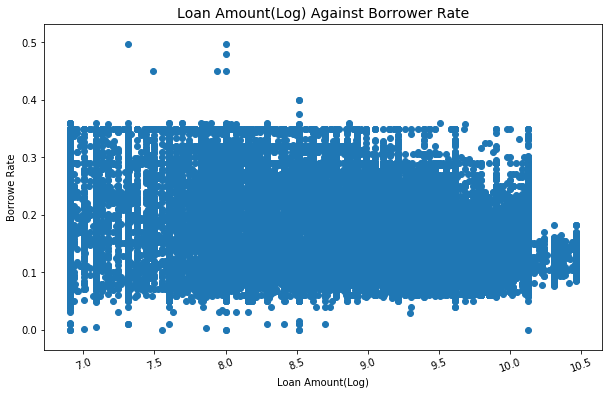

In [34]:
#plot Loan Amount(Log) Against Borrower Rate
fig = plt.figure(figsize=(10,6))
plt.scatter(data=df_summary,x='LoanOriginalAmountLog',y='BorrowerRate')
plt.title('Loan Amount(Log) Against Borrower Rate',fontsize=14)
plt.xticks(rotation=20)
plt.xlabel('Loan Amount(Log)')
plt.ylabel('Borrowe Rate')
plt.show()

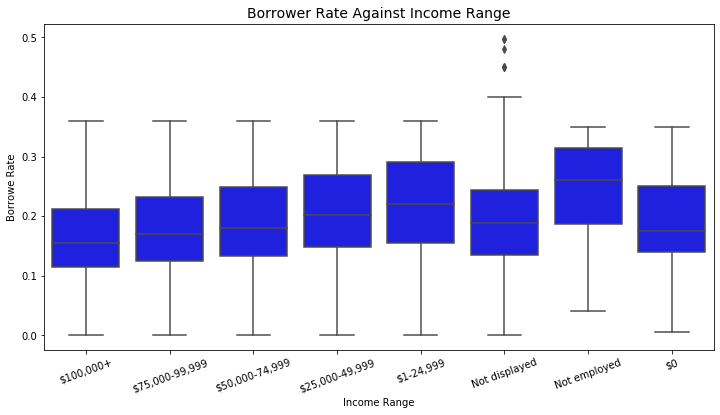

In [35]:
#plot Borrower Rate Against Income Range
fig = plt.figure(figsize=(12,6))
sb.boxplot(data=df_summary,x='IncomeRange',y='BorrowerRate',color='blue', order=['$100,000+','$75,000-99,999', '$50,000-74,999','$25,000-49,999',
       '$1-24,999','Not displayed', 'Not employed', '$0'])
plt.title('Borrower Rate Against Income Range',fontsize=14)
plt.xticks(rotation=20)
plt.xlabel('Income Range')
plt.ylabel('Borrowe Rate')
plt.show()

Borrower Rate trend to be higher for not employed or low income range

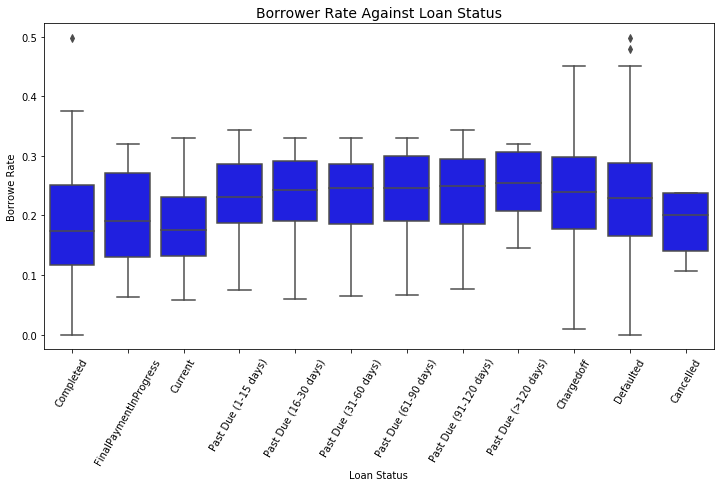

In [36]:
#plot Borrower Rate Against Loan Status
fig = plt.figure(figsize=(12,6))
sb.boxplot(data=df_summary,x='LoanStatus',y='BorrowerRate',color='blue',order=['Completed', 'FinalPaymentInProgress', 'Current', 'Past Due (1-15 days)', 
        'Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)', 'Past Due (91-120 days)','Past Due (>120 days)',
                                                      'Chargedoff','Defaulted', 'Cancelled'])
plt.title('Borrower Rate Against Loan Status',fontsize=14)
plt.xticks(rotation=60)
plt.xlabel('Loan Status')
plt.ylabel('Borrowe Rate')
plt.show()

Borrower Rate increase with bad loan status

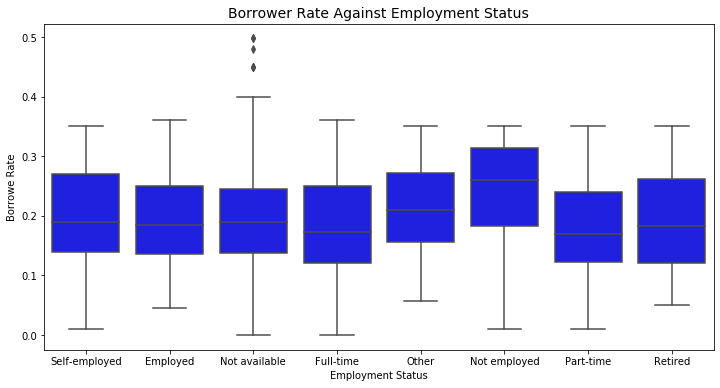

In [42]:
#plot Borrower Rate Against Employment Status
fig = plt.figure(figsize=(12,6))
sb.boxplot(data=df_summary,x='EmploymentStatus',y='BorrowerRate',color='blue')
plt.title('Borrower Rate Against Employment Status',fontsize=14)
plt.xlabel('Employment Status')
plt.ylabel('Borrowe Rate')
plt.show()

Borrower Rate for full and part time employment have the lower median

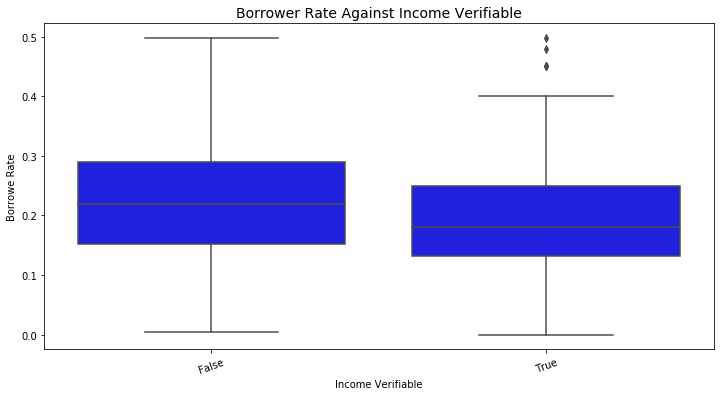

In [38]:
#plot Borrower Rate Against Income Verifiable
fig = plt.figure(figsize=(12,6))
sb.boxplot(data=df_summary,x='IncomeVerifiable',y='BorrowerRate',color='blue')
plt.title('Borrower Rate Against Income Verifiable',fontsize=14)
plt.xticks(rotation=20)
plt.xlabel('Income Verifiable')
plt.ylabel('Borrowe Rate')
plt.show()

As expected borrower rate have lower median and range for verified income

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Current loan status have higher loan amount and wider range of values,all cancelled loans have low loan amount
Most of loans current or completed is associated with  income range from 25,000-49,999 or from 50,000-74,999.
Most current loans is with employed status, and completed loans is with employed and full time.
Borrower Rate trend to be higher for not employed or low income range
Borrower Rate increase with bad loan status
Borrower Rate for full and part time employment have the lower median
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> For completed,current and charged off loans status there is a lot a loans with high total credit lines in past 7 years which is far from median
As expected borrower rate have lower median and range for verified income.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [24]:
df_summary.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

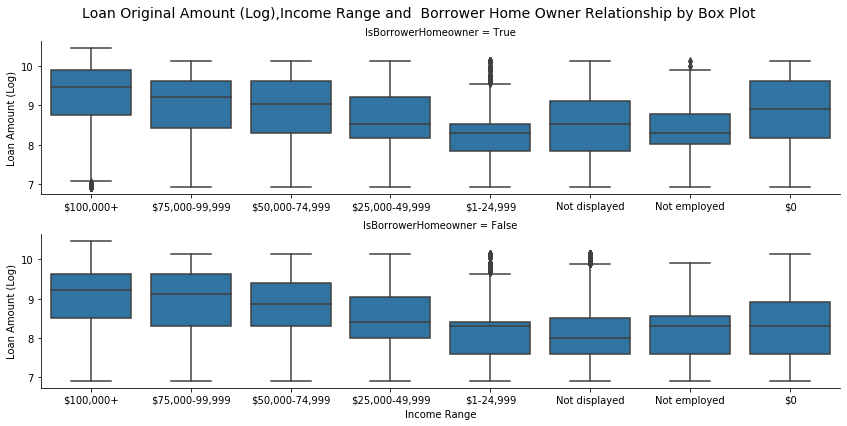

In [25]:
# use facetgrid to display Loan Original Amount Log,Income Range and  Borrower Home owner relationship
g=sb.FacetGrid(df_summary,col='IsBorrowerHomeowner',col_order=[True,False],aspect=4,col_wrap=1,margin_titles=True,sharex=False
              )
g.map(sb.boxplot,'IncomeRange','LoanOriginalAmountLog',order=['$100,000+','$75,000-99,999', '$50,000-74,999','$25,000-49,999',
       '$1-24,999','Not displayed', 'Not employed', '$0'])
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Loan Original Amount (Log),Income Range and  Borrower Home Owner Relationship by Box Plot',fontsize=14)
plt.xlabel('Income Range')
for ax in g.axes.flat:
    ax.set_ylabel('Loan Amount (Log)')
plt.show()

When BorrowerHomeOwner equal yes loan amount values is higer than same income range with BorrowerHomeOwner equal no.
also loan amount values higher for large income range

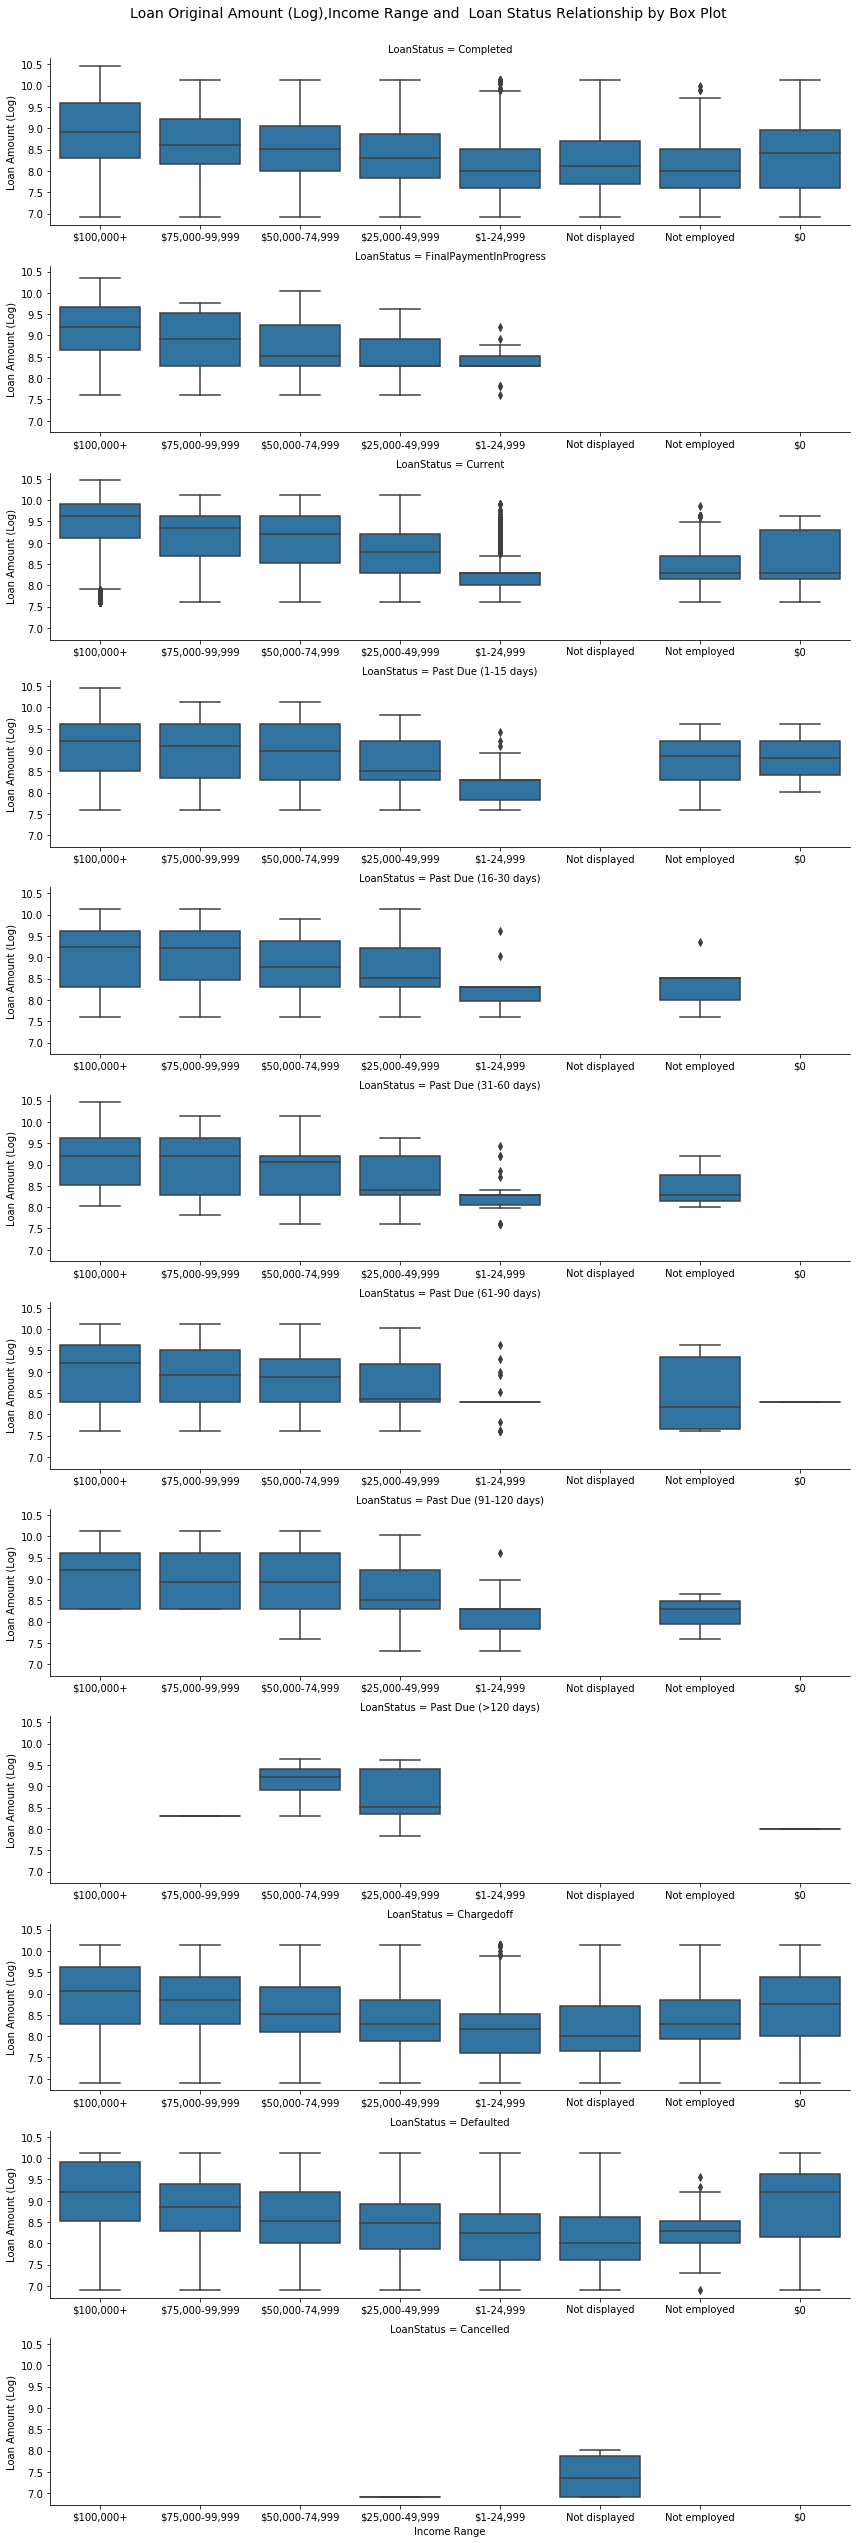

In [26]:
# use facetgrid to display Loan Original Amount Log,Income Range and Loan Status relationship
g=sb.FacetGrid(df_summary,col='LoanStatus',col_order=['Completed', 'FinalPaymentInProgress', 'Current', 'Past Due (1-15 days)', 
        'Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)', 'Past Due (91-120 days)','Past Due (>120 days)',
                                                      'Chargedoff','Defaulted', 'Cancelled'],aspect=4,col_wrap=1,margin_titles=True,sharex=False)
g.map(sb.boxplot,'IncomeRange','LoanOriginalAmountLog',order=['$100,000+','$75,000-99,999', '$50,000-74,999','$25,000-49,999',
       '$1-24,999','Not displayed', 'Not employed', '$0'])
g.fig.subplots_adjust(top=0.96)
g.fig.suptitle('Loan Original Amount (Log),Income Range and  Loan Status Relationship by Box Plot',fontsize=14)
plt.xlabel('Income Range')
for ax in g.axes.flat:
    ax.set_ylabel('Loan Amount (Log)')
plt.show()

there is not any past due loans >120 days  in first higher income range, chargedoff and defaulted loan is not relate to low income range which is unexpected

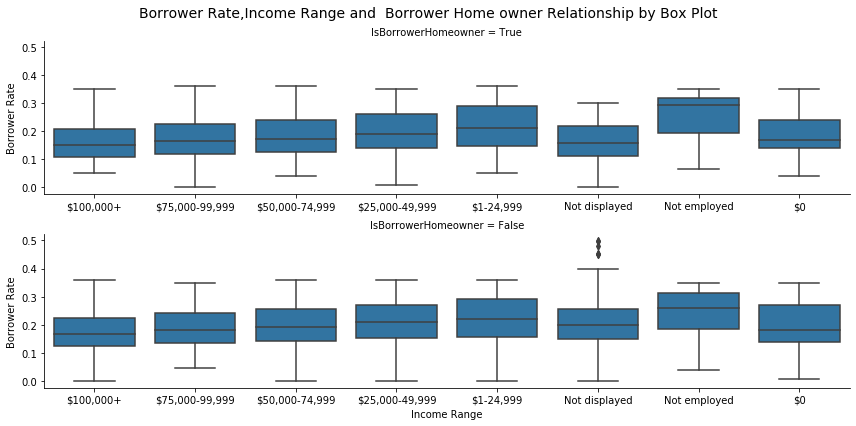

In [27]:
# use facetgrid to display Borrower Rate,Income Range and  Borrower Home owner relationship
g=sb.FacetGrid(df_summary,col='IsBorrowerHomeowner',col_order=[True,False],aspect=4,col_wrap=1,margin_titles=True,sharex=False
              )
g.map(sb.boxplot,'IncomeRange','BorrowerRate',order=['$100,000+','$75,000-99,999', '$50,000-74,999','$25,000-49,999',
       '$1-24,999','Not displayed', 'Not employed', '$0'])
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Borrower Rate,Income Range and  Borrower Home owner Relationship by Box Plot',fontsize=14)
plt.xlabel('Income Range')
for ax in g.axes.flat:
    ax.set_ylabel('Borrower Rate')
plt.show()

Brorrower own homes is not reduce borrower rate,but low income range raise borrower rate.

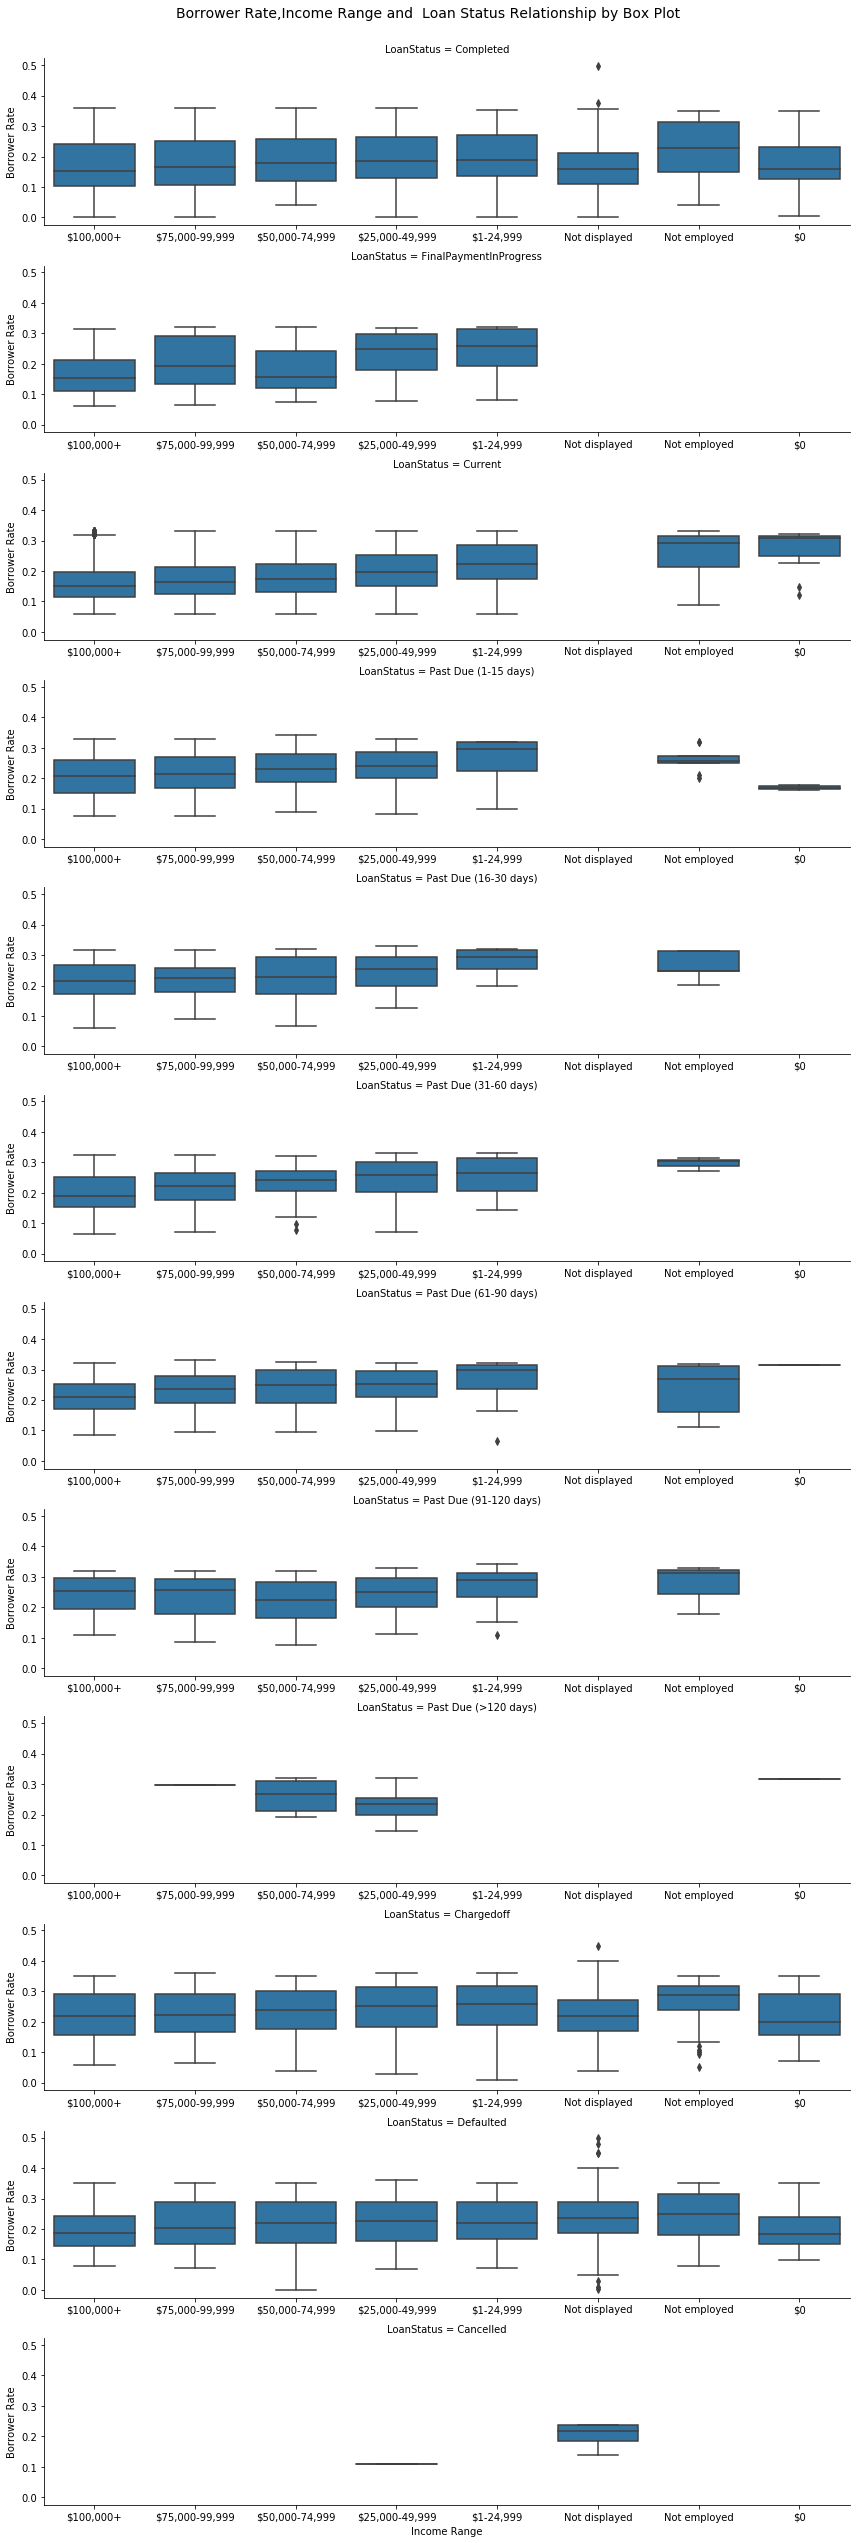

In [28]:
# use facetgrid to display Borrower Rate,Income Range and  Loan Status Relationship
g=sb.FacetGrid(df_summary,col='LoanStatus',col_order=['Completed', 'FinalPaymentInProgress', 'Current', 'Past Due (1-15 days)', 
        'Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)', 'Past Due (91-120 days)','Past Due (>120 days)',
                                                      'Chargedoff','Defaulted', 'Cancelled',],aspect=4,col_wrap=1,margin_titles=True,sharex=False)
g.map(sb.boxplot,'IncomeRange','BorrowerRate',order=['$100,000+','$75,000-99,999', '$50,000-74,999','$25,000-49,999',
       '$1-24,999','Not displayed', 'Not employed', '$0'])
g.fig.subplots_adjust(top=0.96)
g.fig.suptitle('Borrower Rate,Income Range and  Loan Status Relationship by Box Plot',fontsize=14)
plt.xlabel('Income Range')
for ax in g.axes.flat:
    ax.set_ylabel('Borrower Rate')
plt.show()

Borrower rate increase with bad loans and with low income range

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> When BorrowerHomeOwner equal yes loan amount values is higer than same income range with BorrowerHomeOwner equal no.
Loan amount values higher for large income range
there is not any past due loans >120 days  in first higher income range, chargedoff and defaulted loan is not relate to low income range which is unexpected 

Brorrower own homes is not reduce borrower rate,but low income range raise borrower rate.
Borrower rate increase with bad loans and with low income range

### Were there any interesting or surprising interactions between features?

> Borrower owen home affect loan amount more than income range.
Bad loan status is not related to low income

In [29]:
# save final dataset for presentation
df_summary.to_csv('prosperLoanData_summary.csv', index = False)